# Information
$Writer: Junhyuck\ Woo$ <br>
$Std.ID: 20145337$<br>
$Assignment09:\ Multi-label\ classification\ using\ neural\ networks$<br>
$Deadline: May\ 28, 2020$
<hr>

# Library

In [0]:
import matplotlib.pyplot as plt; import numpy as np

# Data

In [0]:
file_data   = "/content/drive/My Drive/Spring|2020/Machine_Learning/CAU-MachineLearning/Assignment09/mnist.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)
count       = 0     # count for the number of images

#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

#
# make a matrix each column of which represents an images in a vector form
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label[count]       = label
    list_image[:, count]    = im_vector

    count += 1

# Split data as train one and test one
Train: [1~6000] <br>
Test: [6001 ~ 10000]

In [0]:
train_m = 6000
test_m = 4000
train_image = list_image[:,:6000]
test_image = list_image[:, 6000:]
train_label = list_label[:6000]
test_label = list_label[6000:]

# Neural Network Architecture
```mermaid
graph LR
    A([input layer : x])-->B([first hidden layer : y])-->C([second hidden layer : z])-->D([output layer : h])
```

```mermaid
graph LR
    A([x])-- fully connected : u -->B([y_])-- sigmoid -->C([y])-- fully connected : v -->D([z_])-- sigmoid -->E([z])-- fully connected : w -->F([h_])-- sigmoid -->G([h])
```
* input layer : 784 (+ a bias)
* first hidden layer : 196 (+ a bias)
* second hidden layer : 49 (+ a bias)
* output layer : 10

In [0]:
mean = 0
sigma = 1
node_num = [784, 196, 49, 10]

network = []
for i, v in enumerate(node_num[:-1]):
    network.append(np.random.normal(mean, sigma, (node_num[i+1], node_num[i]+1)))

# Sigmoid Function (= activation function)
$\sigma(z) = \frac{1}{1 + \exp(-z)}$<b

In [0]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def sigmoid_(z_):
    return z_*(1-z_)

# Objective Function
$J(\theta) = \frac{1}{m} \sum_{i=1}^m \sum_{k=0}^{9}( - l^{(i)}_k \log( h^{(i)}_k ) - (1 - l^{(i)}_k) \log(1 - h^{(i)}_k) )$<br>
$\theta = (u, v, w)$

In [0]:
def one_hot(l):
    new_label = np.zeros((10,len(l)))
    for i, v in enumerate(l):
        new_label[v][i] = 1
    return new_label
    

def j_func(h, label, size):
    loss_list = -label*np.log(h) - (1 - label)*np.log(1-h)
    loss = np.sum(loss_list)
    return (loss/size)

# Gradient Descent (Back-propagation)

In [0]:
def prop(model, bias, data):
    # Attach Bias
    x_ = np.concatenate((bias, data), axis=0)
    y = np.dot(model[0], x_)
    y_ = sigmoid(y)
    # Attach Bias
    y__ = np.concatenate((bias, y_), axis=0)
    z = np.dot(model[1], y__)
    z_ = sigmoid(z)
    # Attach Bias
    z__ = np.concatenate((bias, z_), axis=0)
    h = np.dot(model[2], z__)
    h_ = sigmoid(h)
    return [x_, y__, z__, h_]

def backprop(model, node, l):
    alpha = 0.0002
    new_model = model
    x = node[0]
    y = node[1]
    z = node[2]
    h = node[3]

    # W
    tmp = h - l
    new_model[2] = new_model[2] - alpha * np.dot(tmp, z.T)
    
    # v
    tmp = np.dot(new_model[2].T[1:,:], tmp) * sigmoid_(z[1:])
    new_model[1] = new_model[1] - alpha * np.dot(tmp, y.T)

    # u 
    tmp = np.dot(new_model[1].T[1:, :], tmp) * sigmoid_(y[1:])
    new_model[0] = new_model[0] - alpha * np.dot(tmp, x.T)

    return new_model

# Optimization

In [8]:
# Varibales
count = 1
accuracy = [0, 0]
accuracy_history = [[], []]
j = [0, 0]
j_old = [0, 0]
j_history = [[], []]
bias_train = np.array([np.ones(6000)])
bias_test = np.array([np.ones(4000)])
train_oh_label = one_hot(train_label)
test_oh_label = one_hot(test_label)

while (True):
    # Reset the variables
    accuracy = [0, 0]
    j_old = j
    j = [0, 0]

    # Train
    # Forward propagation
    node = prop(network, bias_train, train_image)

    # Train Loss
    j[0] = j_func(node[3], train_oh_label, train_m)

    # Train Accuracy
    h_argmax = []
    for i, v in enumerate(h_.T):
        h_argmax.append(np.argmax(v))
    accuracy[0] = np.sum(1*np.equal(h_argmax, train_label))

    '''# Test
    # Forward propagation
    # Attach Bias
    t_x_ = np.concatenate((bias_test, train_image), axis=0)
    nodes[0] = t_x_
    t_y = np.dot(network[0], t_x_)
    t_y_ = sigmoid(t_y)
    # Attach Bias
    t_y__ = np.concatenate((bias_test, t_y_), axis=0)
    nodes[1] = t_y_
    t_z = np.dot(network[1], t_y__)
    t_z_ = sigmoid(t_z)
    # Attach Bias
    t_z__ = np.concatenate((bias_test, t_z_), axis=0)
    nodes[2] = t_z_
    t_h = np.dot(network[2], t_z__)
    t_h_ = sigmoid(t_h)'''

    
    # Test Loss
    # j[1] = j_func(, test_oh_label, test_m)
    
    # Test Accuracy
    #h_argmax = []
    #for i, v in enumerate(t_h_.T):
    #    h_argmax.append(np.argmax(v))
    #accuracy[1] = np.sum(1*np.equal(h_argmax, test_label))
    
    # Back-propagation
    network = backprop(network, node, train_oh_label)
      
    # Record the history
    accuracy_history[0].append(accuracy[0])
    j_history[0].append(j[0])
    #accuracy_history[1].append(accuracy[1])
    #j_history[1].append(j[1])

    if count%20==0:
        print(count, "\nAcc: ", (accuracy[0]*100 / len(h_argmax)))
        print("Loss: ", j[0])

    # Break Point
    if (count==300):
        break

    # Count Iteration
    count = count + 1

print("Loss Diff: ", j[0])

20 
Acc:  25.966666666666665
Loss:  3.8458842729009453
40 
Acc:  39.21666666666667
Loss:  2.9795827709742624
60 
Acc:  50.4
Loss:  2.4342685663034516
80 
Acc:  61.016666666666666
Loss:  2.087873947510793
100 
Acc:  63.15
Loss:  1.9591421056462361
120 
Acc:  68.78333333333333
Loss:  1.7040625188314398
140 
Acc:  75.01666666666667
Loss:  1.4561153552884556
160 
Acc:  75.83333333333333
Loss:  1.3876068106556456
180 
Acc:  79.75
Loss:  1.2174748310118542
200 
Acc:  81.9
Loss:  1.1058773251727019
220 
Acc:  83.98333333333333
Loss:  1.0107695260123022
240 
Acc:  85.96666666666667
Loss:  0.9280372130962943
260 
Acc:  87.2
Loss:  0.8695976905977443
280 
Acc:  88.06666666666666
Loss:  0.8223180980658906
300 
Acc:  88.85
Loss:  0.780288083576372


In [0]:
good_examples = []
for i, v in enumerate(good_ex):
    good_examples.append(train_image[:, v])

In [0]:
good_ex = []
bad_ex = []
for i, v in enumerate(h_argmax):
    if v==train_label[i]:
        if (len(good_ex)==10):
            continue
        else:
            good_ex.append(i)
    else:
        if (len(bad_ex)==10):
            continue
        else:
            bad_ex.append(i)
    if (len(good_ex)==10) and (len(bad_ex)==10):
        break

# Check the history for display example

In [0]:
correct_examples = []
correct_examples_num = 0
misclassified_examples = []
misclassified_examples_num = 0

for i, v in enumerate(test_label):
    logic = (v == 

    if correct_examples_num <= 10:

    else:
       if misclassified_examples_num == 10:
           break
           
    if misclassified_examples_num < 10:
        
    else:
        if correct_examples_num == 10:
            break

___
#Result

# 1. Loss Curve

In [0]:
plt.figure(figsize=(15,9))
plt.plot(j_history[0], color='blue', label='Train Loss')
plt.plot(j_history[1], color='red', label='Test Loss')
plt.grid()
plt.legend()
plt.title('Loss Curve', fontsize=40)
plt.xlabel('Iteration', fontsize=20)
plt.ylabel('Error', fontsize=20)

# 2. Accuravy Curve

In [0]:
plt.figure(figsize=(15,9))
plt.plot(accuracy_history[0], color='blue', label='Train Accuracy (%)')
plt.plot(accuracy_history[1], color='red', label='Test Accuracy (%)')
plt.grid()
plt.legend()
plt.title('Accuracy', fontsize=40)
plt.xlabel('Iteration', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)

# 3. Accuracy Value

In [0]:
print('Final Accuracy')
print('Train: %lf' %(accuracy[0]))
print('Test: %lf' %(accuracy[1]))

Final Accuracy
Train: 0.001000
Test: 0.000200


# 4. Classification Example

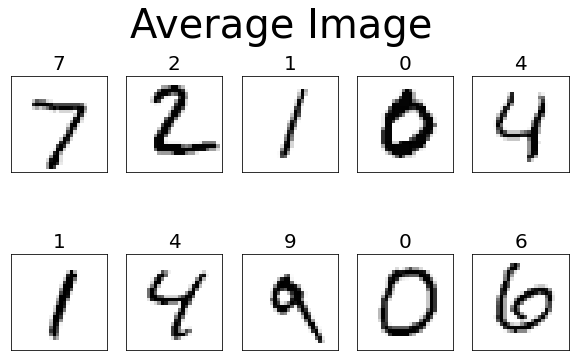

In [31]:
f1 = plt.figure(figsize=(10,6))
plt.suptitle("Average Image", fontsize = 40)
for i in range(10):

    im_vector   = good_examples[i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(2, 5, i+1)
    plt.title(h_argmax[good_ex[i]], fontsize=20)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

In [23]:
good_examples[0].shape

(6000,)

In [29]:
h_argmax()

TypeError: ignored

In [30]:
good_ex[0]

0